# Proyek Analisis Data: [E-Comerce Public Dataset]
- **Nama:** [Apriliza Vina Hasanah]
- **Email:** [aprilizavina@gmail.com]
- **ID Dicoding:** [apriliza_vina]

## Menentukan Pertanyaan Bisnis

- Tipe pembayaran apa yang paling banyak digunakan oleh customer?
- Produk category apa yang paling banyak terjual dan paling sedikit?
- Manakah kota dengan rate penjualan tertinggi? 

## Import Semua Packages/Library yang Digunakan

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Menambahkan Data Payments

In [154]:
order_payment_df = pd.read_csv("https://raw.githubusercontent.com/AprilizaVina/submission/main/data/order_payments_dataset")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Menambahkan Data Products

In [155]:
products_df = pd.read_csv("https://raw.githubusercontent.com/AprilizaVina/submission/main/data/products_dataset")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Menambahkan Data Order Items

In [156]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/AprilizaVina/submission/main/data/order_items_dataset")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Menambahkan Data Sellers

In [157]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/AprilizaVina/submission/main/data/sellers_dataset")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai Tabel Payments

In [158]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [159]:
print("Jumlah duplikasi: ",order_payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [160]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Manilai Tabel Products

In [161]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [162]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [163]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [164]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Data Order Items

In [165]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [166]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [167]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Data Sellers

In [168]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [169]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [170]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Menangani Missing Value dari Data Products

In [171]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [172]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [173]:
products_df.fillna(value="cama_mesa_banho", inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\1627234901.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="cama_mesa_banho", inplace=True)


In [174]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

#### Mencari Tipe Pembayaran yang banyak digunakan

In [182]:
all_df = pd.merge(
    left=order_items_df,
    right=order_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [176]:
all_df.groupby(by="payment_type").order_item_id.sum().sort_values(ascending=False)

payment_type
credit_card    102941
boleto          28640
voucher          7105
debit_card       1953
Name: order_item_id, dtype: int64

#### Mencari Produk yang paling banyak terjual

In [177]:
all_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [178]:
all_df.groupby(by="product_category_name").order_item_id.sum().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           15543
moveis_decoracao          11540
beleza_saude              11081
esporte_lazer              9932
informatica_acessorios     9874
utilidades_domesticas      9051
relogios_presentes         6594
ferramentas_jardim         5874
telefonia                  5161
automotivo                 4881
Name: order_item_id, dtype: int64

#### Mencari Kota dengan rate penjualan tertinggi

In [179]:
all_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [180]:
all_df.groupby(by="seller_city").order_item_id.sum().sort_values(ascending=False).head(10)

seller_city
sao paulo                33946
ibitinga                  9542
sao jose do rio preto     3659
santo andre               3516
curitiba                  3497
rio de janeiro            2912
belo horizonte            2847
guarulhos                 2839
maringa                   2777
ribeirao preto            2696
Name: order_item_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tipe pembayaran apa yang paling banyak digunakan oleh customer?

In [183]:
sum_order_payment_df = all_df.groupby(by="payment_type").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_payment_df.head()

,payment_type,order_item_id
0,credit_card,102941
1,boleto,28640
2,voucher,7105
3,debit_card,1953


C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\2894141733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="order_item_id", data=sum_order_payment_df.head(), palette=colors, ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\2894141733.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="payment_type", y="order_item_id", data=sum_order_payment_df.head(), palette=colors, ax=ax)


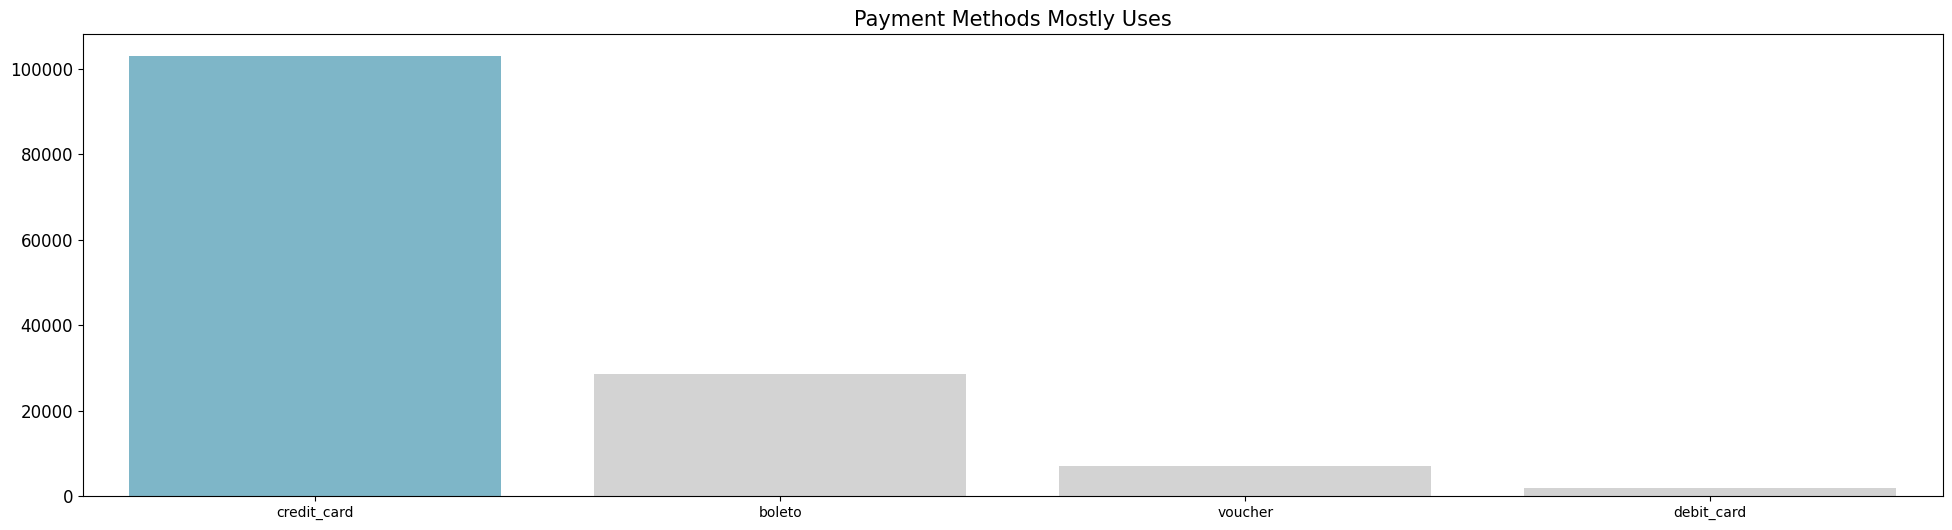

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="payment_type", y="order_item_id", data=sum_order_payment_df.head(), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Payment Methods Mostly Uses", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

### Pertanyaan 2: Produk category apa yang paling banyak terjual dan paling sedikit?

In [ ]:
sum_product_category_df = all_df.groupby(by="product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_product_category_df.head(10)

,product_category_name,order_item_id
0,cama_mesa_banho,15543
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874
5,utilidades_domesticas,9051
6,relogios_presentes,6594
7,ferramentas_jardim,5874
8,telefonia,5161
9,automotivo,4881


C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\3945642152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_product_category_df.head(5), palette=colors, ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\3945642152.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_product_category_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


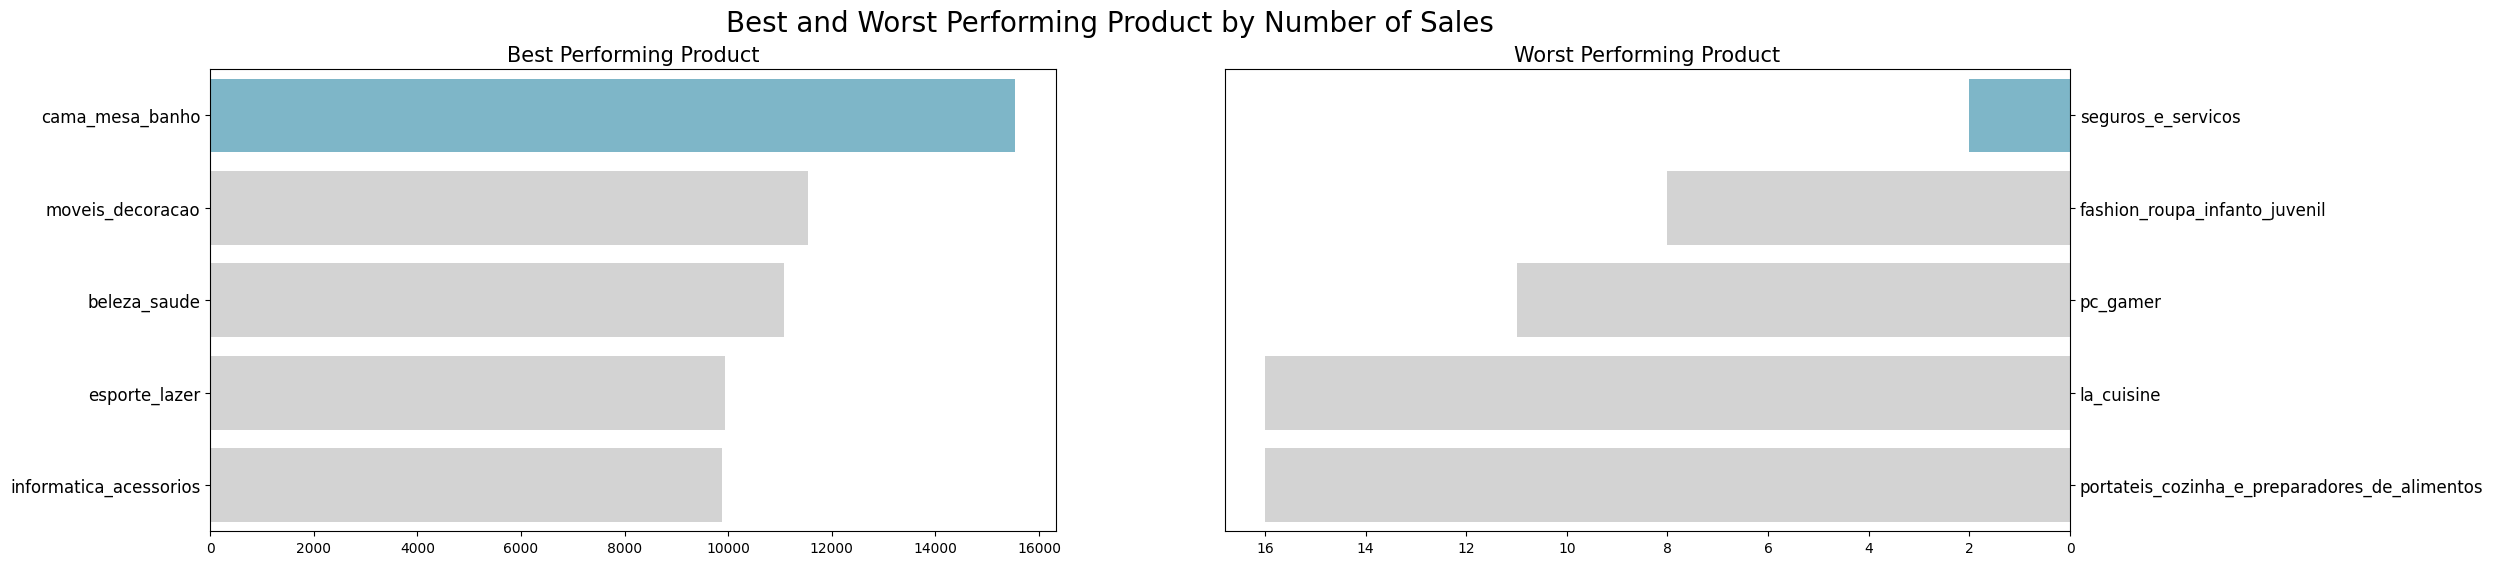

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_product_category_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_product_category_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Manakah kota dengan rate penjualan tertinggi? 

In [ ]:
sum_seller_city_df = all_df.groupby(by="seller_city").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_seller_city_df.head(10)

,seller_city,order_item_id
0,sao paulo,33946
1,ibitinga,9542
2,sao jose do rio preto,3659
3,santo andre,3516
4,curitiba,3497
5,rio de janeiro,2912
6,belo horizonte,2847
7,guarulhos,2839
8,maringa,2777
9,ribeirao preto,2696


C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\4125443535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="seller_city", data=sum_seller_city_df.head(10), palette=colors, ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_15860\4125443535.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="order_item_id", y="seller_city", data=sum_seller_city_df.head(10), palette=colors, ax=ax)


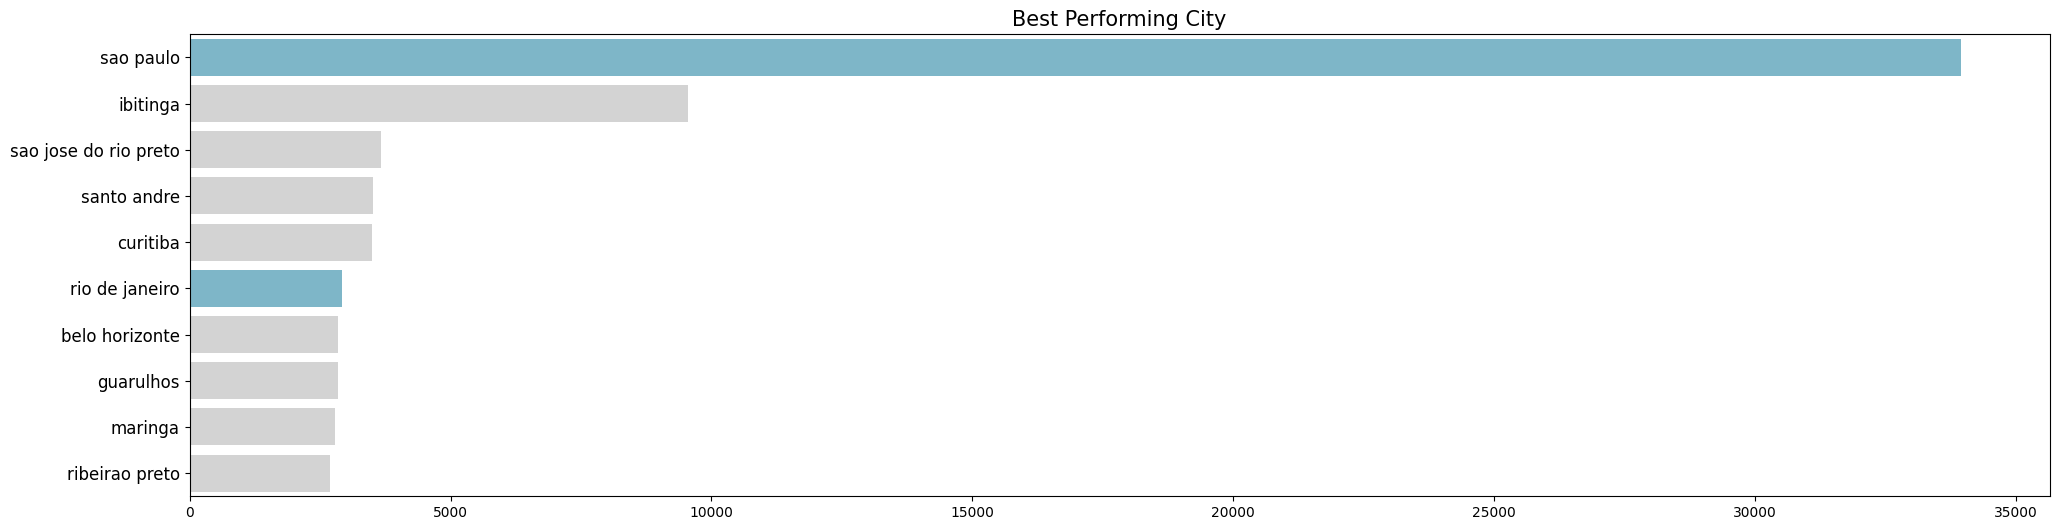

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="seller_city", data=sum_seller_city_df.head(10), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Performing City", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

## Conclusion

- Conclusion pertanyaan 1
Berdasarkan hasil analisis dan visualisasi, dapat ditarik kesimpulan bahwa metode pembayaran yang paling banyak digunakan oleh customers adalah credit card, diikuti oleh boleto, voucher, dan credit card. berdasarkan hasil ini, perusahaan dapat menambahkan beberapa promo menarik melalui metode pembayaran tersebut dengan melakukan kerjasama bersama berbagai bank untuk menarik lebih banyak customers berbelanja karena kemaudahan dalam metode pembayaran yang tersedia.
- Conclusion pertanyaan 2
Berdasarkan hasil analisis dan visualisasi, dapat ditarik kesimpulan yaitu produk yang paling banyak terjual adalah cama mesa banho, movies decoracao, beleza saude, esporte lazer, dan informatica acessorios, sedangkan produk yang paling sedikit terjual adalah protaries, la cuisine, pc gamer, fashion roupa, dan seguros e servicos. Dari hasil analisis ini, perusahaan dapat membuat langkah strategis marketing untuk menarik minat pelanggan dengan memperbanyak variasi produk yang paling banyak terjual serta melakukan evaluasi dan peningkatan variasi, marketing, atau kulaitas di produk yang kurang banyak terjual.
- Conclusion pertanyaan 3
Berdasarkan hasil analisis dan visulaisasi, dapat ditarik kesimpulan bahwa kota dengan penjual yang paling banyak menjual produk adalah sao paulo, ibtinga, sao jose do rio preto, santo andre, curitiba, rio de janeiro, belo horizonte, guarulhos, maringa, dan ribeirao preto. Dari hasil analisis ini, perusahaan dapat terus meningkatkan pengiriman barang yang ada di kota-kota tersebut agar barang dapat sampai kepada customers tepat pada waktunya. Selain itu, perusahan juga dapat melakukan marketing melalui seller di kota-kota tersebut untuk menaikan rate penjualan.